# Exploratory Data Analysis (EDA) for the COVID-19 Mortality Objective

This section explores the relationship between average long-term PM₂.₅ concentrations (2010–2019), 2020 SDI values, and COVID-19 death rates in 2020 across countries. We aim to understand whether prior exposure to air pollution and socio-demographic development levels might help explain differences in COVID-19 outcomes.


In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Preview Dataset

We'll begin by loading the final cleaned dataset containing the average PM₂.₅ concentrations (2010–2019), SDI values for 2020, and COVID-19 death rates for 2020.

In [3]:
eda_covid = pd.read_csv("../1_datasets/final_datasets/final_merged_covid_pm25_sdi.csv")

### Descriptive Statistics

We’ll summarize the key variables — COVID-19 death rate, average PM2.5, and SDI to understand their distributions and central tendencies.


In [ ]:
# Basic info
print(eda_covid.info())
print(eda_covid.describe())
eda_covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              190 non-null    object 
 1   COVID_Deaths_Rate    190 non-null    float64
 2   upper                190 non-null    float64
 3   lower                190 non-null    float64
 4   Mean_PM25_2010_2019  190 non-null    float64
 5   Year                 190 non-null    int64  
 6   SDI_mean_value       190 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.5+ KB
None
       COVID_Deaths_Rate         upper         lower  Mean_PM25_2010_2019  \
count       1.900000e+02  1.900000e+02  1.900000e+02           190.000000   
mean        6.570683e+01  8.232673e+01  5.113240e+01            22.641584   
std         5.874725e+01  7.287646e+01  4.743728e+01            14.428675   
min         2.970584e-11  2.970584e-11  2.970584e-11             5.306

,Country,COVID_Deaths_Rate,upper,lower,Mean_PM25_2010_2019,Year,SDI_mean_value
0,Lao People's Democratic Republic,6.867837e-11,6.867837e-11,6.867837e-11,21.164,2020,0.484193
1,Sri Lanka,2.820345e+00,2.820345e+00,2.820345e+00,23.948,2020,0.697649
2,Fiji,8.084884e+00,1.685940e+01,2.008246e+00,7.272,2020,0.671431
3,Samoa,2.370317e-09,2.370317e-09,2.370317e-09,7.623,2020,0.590075
4,Malaysia,1.516114e+00,2.286782e+00,8.061217e-01,21.670,2020,0.738744


### Visualizing Distributions

Here we explore the distributions of:
- COVID-19 death rate
- Average PM₂.₅ concentration
- 2020 SDI

This helps detect skewness, outliers, and general trends.


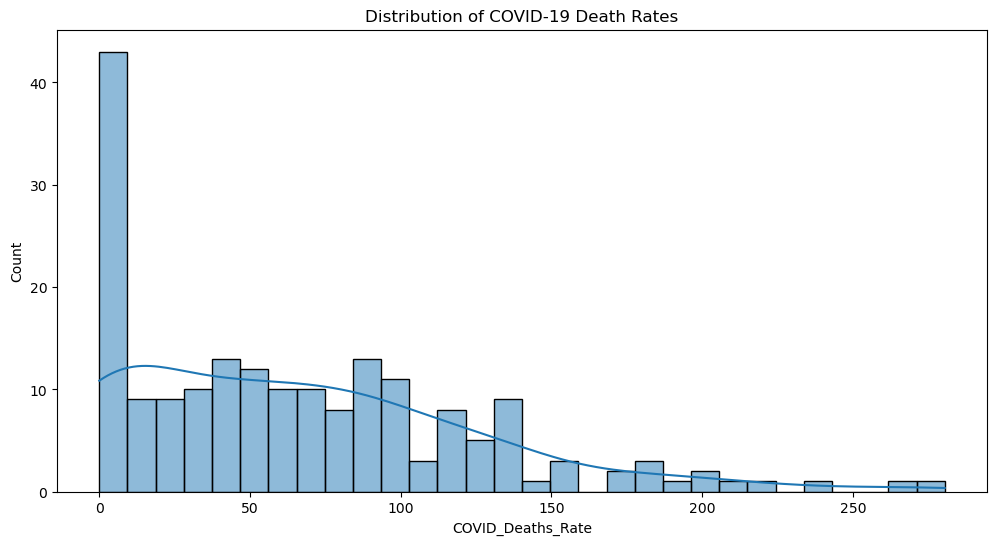

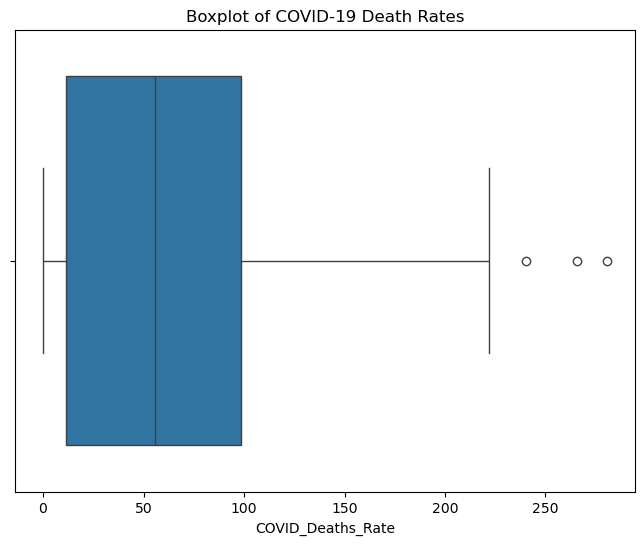

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["COVID_Deaths_Rate"], kde=True, bins=30)
plt.title("Distribution of COVID-19 Death Rates")
plt.savefig("figures_1/distribution_of_covid_19_Death_Rates", dpi=300)
plt.show()


# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=eda_covid["COVID_Deaths_Rate"])
plt.title("Boxplot of COVID-19 Death Rates")
plt.savefig("figures_1/boxplot_of_covid_19_death_rates", dpi=300)
plt.show()

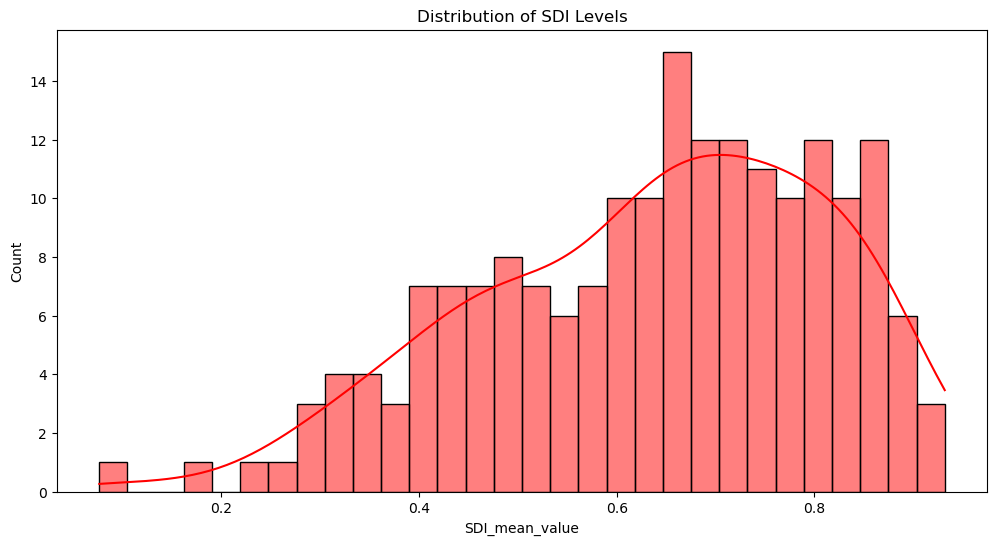

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["SDI_mean_value"], kde=True, bins=30, color="red")
plt.title("Distribution of SDI Levels")
plt.savefig("figures_1/distribution_of_sdi_levels", dpi=300)
plt.show()

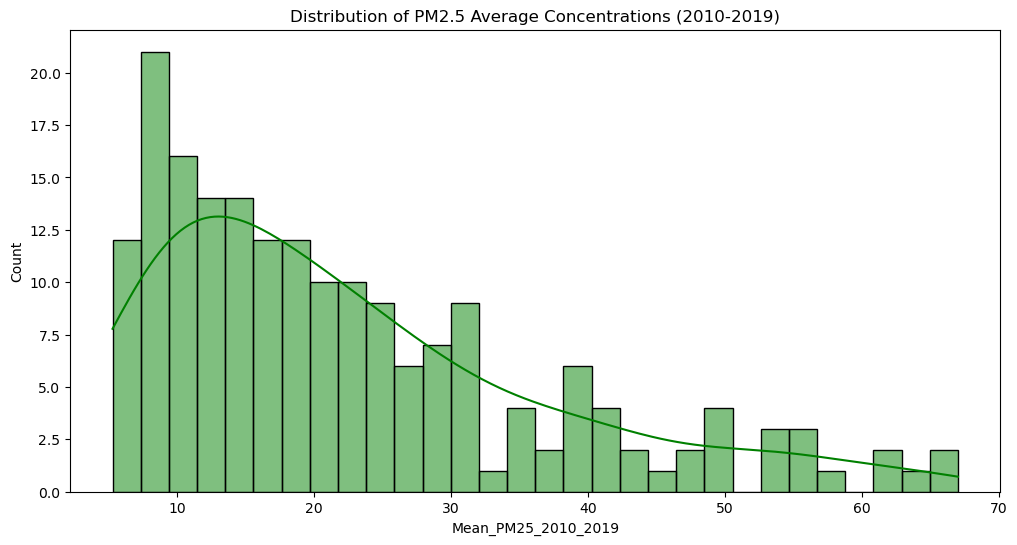

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_covid["Mean_PM25_2010_2019"], kde=True, bins=30, color="green")
plt.title("Distribution of PM2.5 Average Concentrations (2010-2019)")
plt.savefig("figures_1/distribution_of_pm25_average_concentration", dpi=300)
plt.show()

### Scatter Plots: Bivariate Relationships

We visualize how COVID-19 death rates relate to:
- PM2.5 levels (2010–2019)
- SDI in 2020

and SDI in 2020 with the Average PM2.5 concentration

These plots will help assess the direction and strength of relationships.


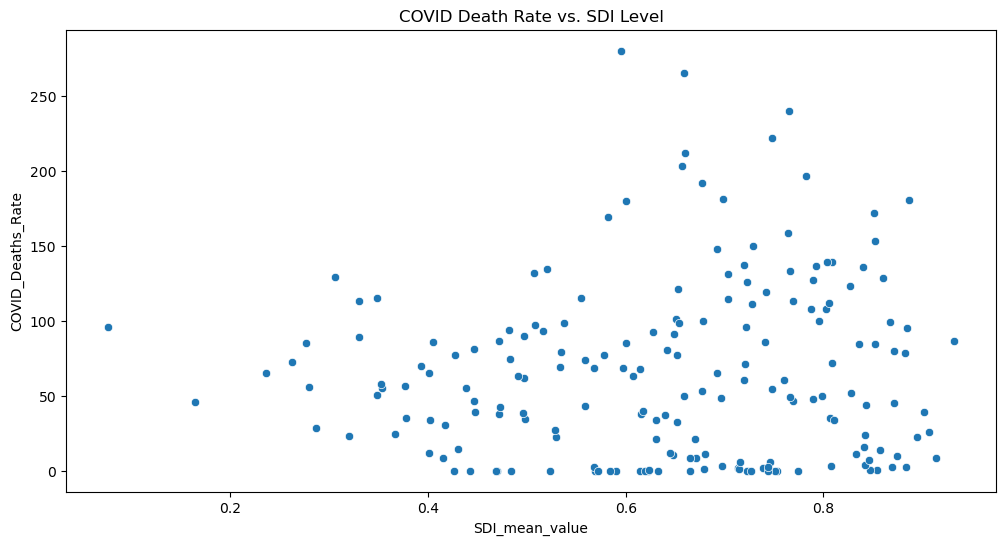

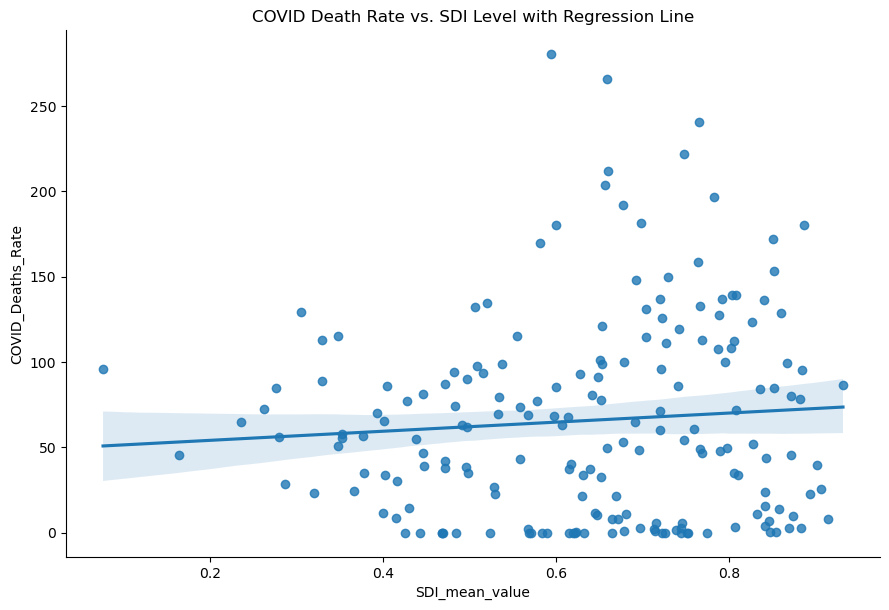

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="SDI_mean_value", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate vs. SDI Level")
plt.savefig("figures_1/scatterplot_covid_sdi", dpi=300)
plt.show()

# With regression line
sns.lmplot(
    x="SDI_mean_value", y="COVID_Deaths_Rate", data=eda_covid, height=6, aspect=1.5
)
plt.title("COVID Death Rate vs. SDI Level with Regression Line")
plt.savefig("figures_1/scatterplot_covid_sdi_with_regression", dpi=300)
plt.show()

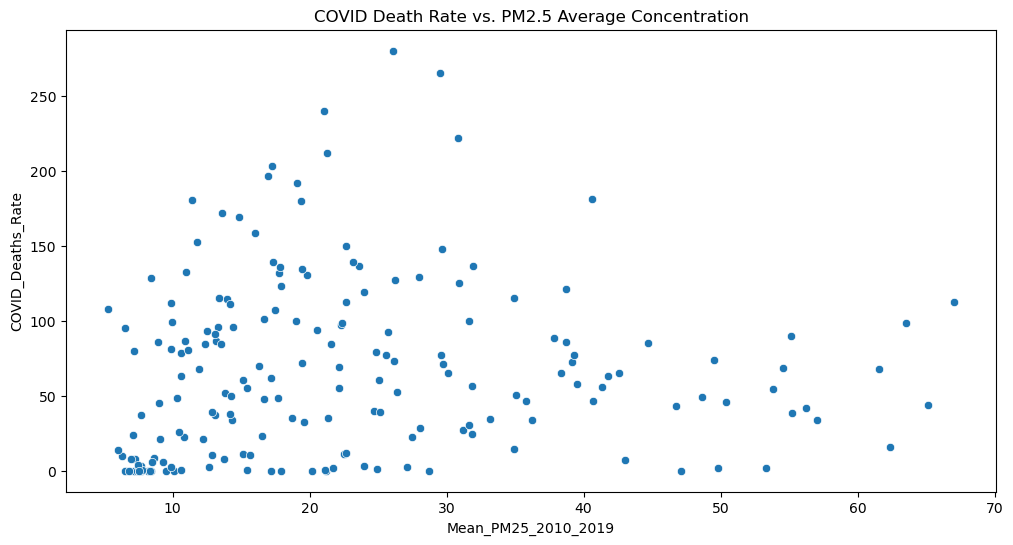

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Mean_PM25_2010_2019", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate vs. PM2.5 Average Concentration")
plt.savefig("figures_1/scatterplot_covid_pm25", dpi=300)
plt.show()

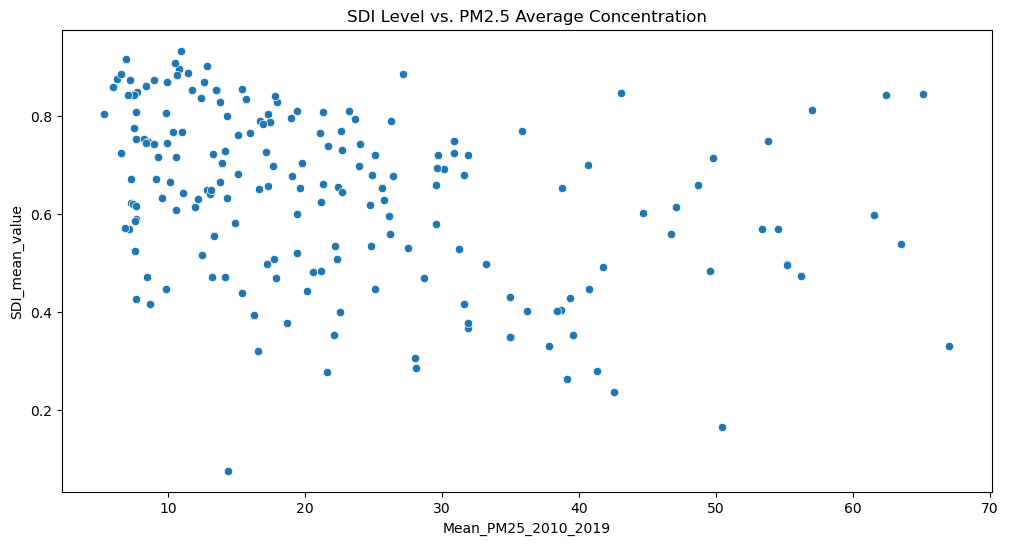

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Mean_PM25_2010_2019", y="SDI_mean_value", data=eda_covid)
plt.title("SDI Level vs. PM2.5 Average Concentration")
plt.savefig("figures_1/scatterplot_pm25_sdi", dpi=300)
plt.show()

### COVID-19 Death Rates Across SDI Categories

To further explore how socio-demographic development (SDI) relates to COVID-19 mortality, we categorized countries into four SDI levels:

- **Low**: SDI < 0.45  
- **Medium**: SDI between 0.45 and 0.60  
- **High**: SDI between 0.60 and 0.75  
- **Very High**: SDI ≥ 0.75

These groupings allow us to compare COVID-19 death rates across development levels using a boxplot. This visualization helps reveal whether certain SDI groups experienced systematically higher or lower mortality outcomes during the pandemic.

The boxplot displays the distribution of COVID-19 death rates within each SDI group, highlighting medians, spread, and potential outliers.


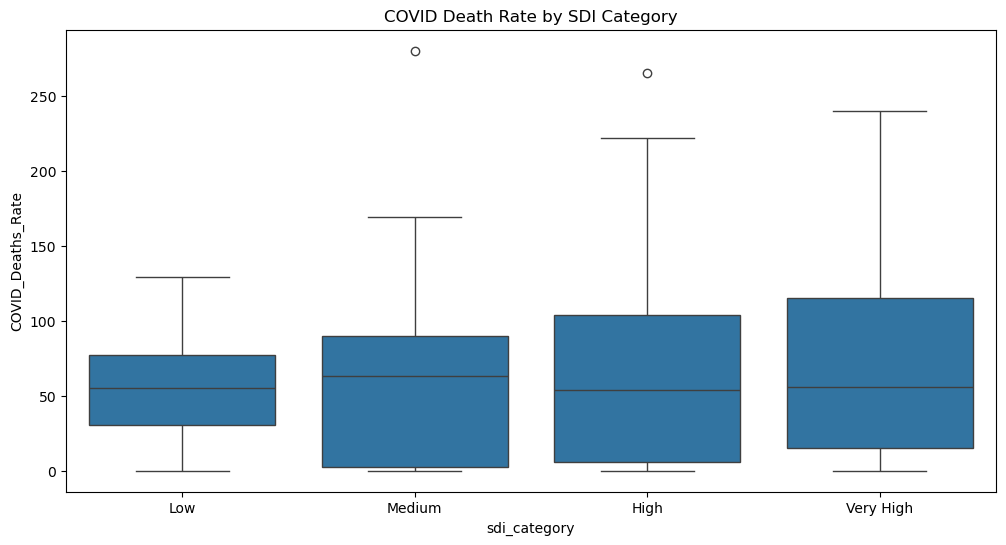

In [ ]:
# Create SDI categories (adjust bins as needed)
eda_covid["sdi_category"] = pd.cut(
    eda_covid["SDI_mean_value"],
    bins=[0, 0.45, 0.60, 0.75, 1],
    labels=["Low", "Medium", "High", "Very High"],
)

# Boxplot of COVID death rate by SDI category
plt.figure(figsize=(12, 6))
sns.boxplot(x="sdi_category", y="COVID_Deaths_Rate", data=eda_covid)
plt.title("COVID Death Rate by SDI Category")
plt.savefig("figures_1/boxplot_covid_sdi_categories", dpi=300)
plt.show()

### Correlation Analysis

Now we check how the variables relate to each other statistically using a correlation matrix. This gives us early hints on possible linear relationships.


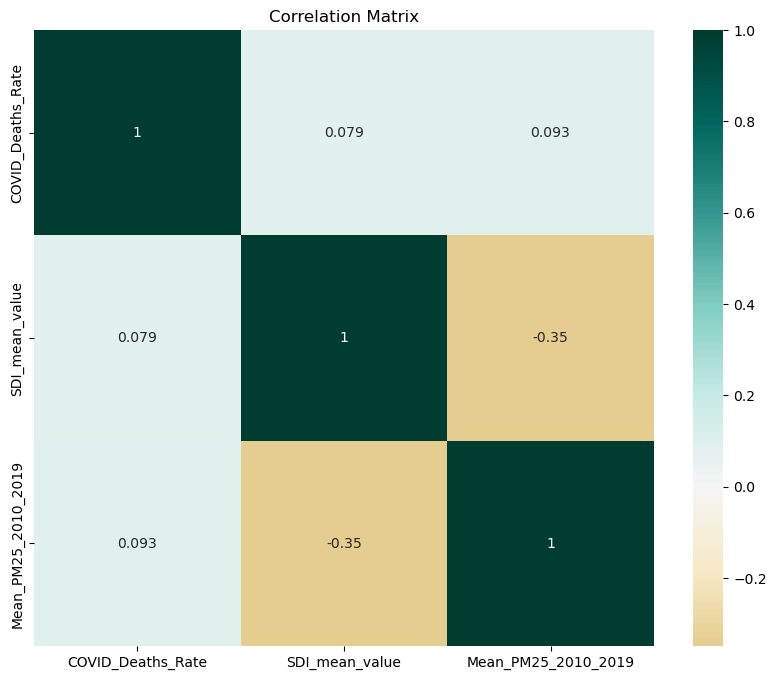

In [ ]:
# Calculate correlation matrix
corr_matrix = eda_covid[
    ["COVID_Deaths_Rate", "SDI_mean_value", "Mean_PM25_2010_2019"]
].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="BrBG", center=0)
plt.title("Correlation Matrix")
plt.savefig("figures_1/correlation_matrix", dpi=300)
plt.show()

### Summary Statistics by SDI Category

To better understand how COVID-19 death rates and long-term PM₂.₅ exposure vary across development levels, we compute summary statistics (mean, std, min, max, etc.) for each SDI category. This grouped descriptive analysis helps identify whether specific SDI groups are disproportionately affected in terms of pandemic mortality or pollution exposure.


In [ ]:
# Summary statistics by SDI category
print(
    eda_covid.groupby("sdi_category")[
        ["COVID_Deaths_Rate", "Mean_PM25_2010_2019"]
    ].describe()
)

C:\Users\hp\AppData\Local\Temp\ipykernel_7964\4080452303.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eda_covid.groupby("sdi_category")[


             COVID_Deaths_Rate                                                 \
                         count       mean        std           min        25%   
sdi_category                                                                    
Low                       33.0  55.060768  33.270756  3.651418e-10  30.297046   
Medium                    37.0  61.531830  58.406505  2.970584e-11   2.132069   
High                      64.0  67.983842  67.415966  4.714003e-09   5.675625   
Very High                 56.0  72.136583  60.406660  2.764638e-08  15.275588   

                                                Mean_PM25_2010_2019  \
                    50%         75%         max               count   
sdi_category                                                          
Low           55.318861   77.160366  129.212747                33.0   
Medium        63.178170   90.083517  280.451601                37.0   
High          53.565302  103.777305  265.656063                64.0   
Very H

### Top 10 Countries by COVID-19 Death Rate and PM2.5 Exposure

This section highlights the countries with the highest COVID-19 mortality rates and the highest long-term PM2.5 concentrations (2010–2019). These outliers are useful for identifying countries that may warrant deeper investigation or serve as case studies in understanding vulnerability.

- **COVID-19 Death Rate (2020):** Countries with the highest pandemic mortality.
- **PM2.5 Exposure:** Countries with the greatest long-term pollution burden.


In [ ]:
# Top 10 countries by each metric
print("Top 10 countries by COVID death rate:")
print(eda_covid.nlargest(10, "COVID_Deaths_Rate")[["Country", "COVID_Deaths_Rate"]])

print("\nTop 10 countries by PM2.5 concentration:")
print(eda_covid.nlargest(10, "Mean_PM25_2010_2019")[["Country", "Mean_PM25_2010_2019"]])

Top 10 countries by COVID death rate:
                              Country  COVID_Deaths_Rate
19   Bolivia (Plurinational State of)         280.451601
181                              Peru         265.656063
42                           Bulgaria         240.326402
157                   North Macedonia         221.881327
63                             Mexico         212.122870
166                           Ecuador         203.433706
145                           Belarus         196.705914
60                       South Africa         191.813949
12                            Armenia         181.219979
40                         San Marino         180.508426

Top 10 countries by PM2.5 concentration:
          Country  Mean_PM25_2010_2019
97    Afghanistan               67.013
75         Kuwait               65.132
173    Tajikistan               63.496
155         Qatar               62.363
28          Egypt               61.554
161  Saudi Arabia               57.003
152      Cameroon   

### Choropleth Map: COVID-19 Death Rates by Country (2020)

This interactive choropleth map visualizes the geographic distribution of COVID-19 death rates in 2020. Hovering over each country displays its SDI value and long-term PM₂.₅ exposure. The map helps identify regional patterns or clusters of high or low mortality and allows us to explore whether such patterns align with environmental or developmental indicators.


In [5]:
import plotly.express as px

# Create the choropleth map using country names directly
fig = px.choropleth(
    eda_covid,
    locations="Country",
    locationmode="country names",
    color="lower",
    hover_name="Country",
    hover_data=["SDI_mean_value", "Mean_PM25_2010_2019"],
    color_continuous_scale=px.colors.sequential.Plasma,
    title="COVID-19 Death Rate (Lower Estimate) by Country (2020)",
    projection="natural earth",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title="Death Rate", thickness=20),
)


fig.show()

# 📊 Summary of COVID-19 Objective EDA

### Objective Recap:
We aimed to explore whether long-term exposure to ambient PM2.5 (2010–2019) and socio-demographic development level (SDI, 2020) are associated with COVID-19 mortality outcomes across countries.

### Key Findings:

1. **Weak Correlation Between PM2.5 and COVID-19 Death Rate:**
   - The correlation between long-term PM2.5 exposure and COVID-19 mortality was very low (`r ≈ 0.09`), suggesting no strong linear relationship at the country level.

2. **Weak Correlation Between SDI and COVID-19 Death Rate:**
   - SDI also showed a very weak positive correlation (`r ≈ 0.08`) with COVID-19 death rates.
   - This may be due to confounding factors such as healthcare infrastructure, population age structure, reporting accuracy, and early pandemic impact in more developed nations.

3. **Moderate Negative Correlation Between SDI and PM2.5:**
   - Countries with higher SDI generally have lower PM2.5 levels (`r ≈ -0.35`), which aligns with known global disparities in environmental quality and regulation.

4. **No Clear Trend in Death Rate Across SDI Groups:**
   - Boxplots and grouped summary statistics show that COVID-19 death rates vary within each SDI category, with no consistent trend suggesting that higher SDI leads to lower mortality.
   - In fact, the average death rate slightly increased across SDI levels:
     - **Low SDI:** ~55  
     - **Medium SDI:** ~61  
     - **High SDI:** ~68  
     - **Very High SDI:** ~72
   - However, all groups exhibited high variability (standard deviation: 33–67), and minimum values were close to zero across the board, indicating high within-group heterogeneity.

5. **Clear Decline in PM2.5 with Increasing SDI:**
   - The same grouped summary showed a steady decrease in mean PM2.5 exposure as SDI increased:
     - **Low SDI:** 29.9 µg/m³  
     - **Medium SDI:** 28.0 µg/m³  
     - **High SDI:** 20.9 µg/m³  
     - **Very High SDI:** 16.8 µg/m³
   - This confirms the known environmental inequality pattern, where lower-SDI countries face greater pollution burdens due to industrialization, limited environmental regulation, or reliance on biomass fuels.

6. **Outliers and Regional Patterns:**
   - Several countries stand out with exceptionally high COVID-19 death rates or PM2.5 levels, indicating potential for more focused case studies or follow-up investigation.
   - The choropleth map shows broad geographic variation in COVID-19 mortality, but no clear regional alignment with SDI or pollution levels alone.

### 📌 Interpretation:
At the country level, neither long-term air pollution exposure nor socio-demographic development levels alone explain COVID-19 mortality variation. These results highlight the complexity of pandemic outcomes and suggest that additional factors such as age structure, comorbidities, health system capacity, and policy response must be considered for a fuller understanding.
